#Evaluación Final - Diplomado Data Science Duoc UC

Grupo 7 - Evaluación Modelo 2

Catalina Cretton A.

Jonathan Santander G.

Yasna Vega E.

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
Proponga al menos 6 preguntas que podamos responder con el análisis exploratorio previo a la construcción de un modelo de Machine Learning, que permita hacer una proyección (regresión) o una clasificación de acuerdo al aspecto elegido de los datos.

Detecte correlaciones relevantes que permitan hacer más óptimo el modelo de ML en combinación con los algoritmos e hiperparámetros adecuados de acuerdo a la solución planteada.

Elabore un informe en Jupyter Notebook haciendo uso de cuadros de texto y cuadros de código para robustecer la solución planteada.


Datos: disponibles en el enlace en una de las celdas de este notebook.


---



**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

In [6]:
!wget https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv

--2022-08-21 05:02:53--  https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xitvmn3jdb1r36i/PlayStore.csv [following]
--2022-08-21 05:02:54--  https://www.dropbox.com/s/raw/xitvmn3jdb1r36i/PlayStore.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb70adb0f59bf8079cef758c2c5.dl.dropboxusercontent.com/cd/0/inline/BrY78PEljvpP0nVmnzIRcEZKPX3szI4lrUlhI5zzqMizg-nqLk7q5uLA4v7L4Sqya593kfsYVAQDP0tucPyvZJk8PbYDkh70HxPbfk3T7cxya4ViYafKJKTSVm3rNNHqUVcoOr3qE04Exh4v81LBOIfss6IVkjGJbIxI1A8Z7KV4mg/file# [following]
--2022-08-21 05:02:54--  https://ucb70adb0f59bf8079cef758c2c5.dl.dropboxusercontent.com/cd/0/inline/BrY78PEljvpP0nVmnzIRcEZKPX3szI4lrUlhI5zzqMizg-nqLk7q5uLA4v7L4Sqya

In [7]:
# Configuración básica inicial
%pylab inline
# Importación de Pandas, Seaborn, Numpy y Matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("precision",5)
####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# importa libreria para obtener las metricas de la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('PlayStore.csv', sep=";")
df

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,"4,8",48,25,"5,000 aprox.",Gratis,0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,"4,7",353,"4,2","10,000 aprox.",Gratis,0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,"4,1",36815,29,"1,000,000 aprox.",Gratis,0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,"4,3",194216,39,"5,000,000 aprox.",Gratis,0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,"4,4",13880,28,"1,000,000 aprox.",Gratis,0,Todo público
...,...,...,...,...,...,...,...,...,...
9136,BPme - Mobile Fuel Payment & BP Driver Rewards...,VIAJES,3,69,31,"10,000 aprox.",Gratis,0,Todo público
9137,Gormey: Find Best Restaurants,VIAJES,"4,3",34,"7,6","1,000 aprox.",Gratis,0,Todo público
9138,NTES,VIAJES,"4,3",165299,"5,4","10,000,000 aprox.",Gratis,0,Todo público
9139,Urbanspoon Restaurant Reviews,VIAJES,"4,2",35560,13,"5,000,000 aprox.",Gratis,0,Todo público


# Análisis Exploratorio de Datos

In [9]:
# Información del DF
print(df.shape)

# Conociendo el DF
print(df.head(5))

# Describiendo el DF
print(df.describe())

# Conociendo la información
print(df.info())

# Cantidad de descargas
print(df.groupby("Descargas").size())


(9141, 9)
                             App      Categoría Valoración  Comentarios  \
0        AJ Styles HD Wallpapers  ARTE Y DISEÑO        4,8           48   
1                I Creative Idea  ARTE Y DISEÑO        4,7          353   
2               Infinite Painter  ARTE Y DISEÑO        4,1        36815   
3  FlipaClip - Cartoon animation  ARTE Y DISEÑO        4,3       194216   
4        Text on Photo - Fonteee  ARTE Y DISEÑO        4,4        13880   

  Tamaño(M)         Descargas    Tipo Precio Clasificación  
0        25      5,000 aprox.  Gratis      0  Todo público  
1       4,2     10,000 aprox.  Gratis      0  Adolescentes  
2        29  1,000,000 aprox.  Gratis      0  Todo público  
3        39  5,000,000 aprox.  Gratis      0  Todo público  
4        28  1,000,000 aprox.  Gratis      0  Todo público  
       Comentarios
count  9.14100e+03
mean   2.49157e+05
std    1.71658e+06
min    0.00000e+00
25%    2.20000e+01
50%    7.42000e+02
75%    2.50940e+04
max    4.48939e+07
<c

## Planteamiento de sus preguntas 

1-Que categoría de app obtuvo mas descargas

2-Qué aplicación obtuvo mas valorizaciones

3-Qué aplicación obtuvo más comentarios

4-Qué tipos de categorías de aplicaciones hay

5-Que grupo de personas descarga más apliacciones

6-Qué tipo de aplicación tiene mas descargas (Pago/gratis)

# Propuesta de limpieza


1ra Propuesta de limpieza: es modificar la variable "Descargas", debido a que es un tipo de dato object, conteniendo la palabra "aprox."

2da Propuesta de limpieza: es modificar en un nuevo campo la variable "Tipo" Gratis = 0 y Pago= 1, para obtener un tipo númerico .

3ra Propuesta de limpieza:  es modificar en un nuevo campo la variable "Clasificación" para obtener un tipo númerico
 
 Adolecentes= 1

 Mayores de 10 años= 2

 Mayores de 17 años= 3

 Sin clasificación= 4

 Sólo adultos= 5

Todo público= 6

4ta Propuesta de limpieza: es modificar la variable "Tamaño(m)", debido a que es un tipo de dato object, conteniendo un caracter ",".

5ta Propuesta de limpieza: es modificar la variable "Valoración", debido a que es un tipo de dato object, conteniendo un caracter ","

6ta Propuesta de limpieza: validación y limpieza de datos nulos (null), correponde a datos no valorizados por los clientes que descargan las app, siendo estas gratis o pagadas.

7ma Propuesta de limpieza: es modificar la variable "Precio", debido a que es un tipo de dato object, conteniendo un caracter ","


In [10]:
# Ejecución de limpieza 1 
import re
df['Descargas'] = df['Descargas'].apply(lambda x : int((re.sub(r"[,\ aprox\.]", "",x).replace(',','.'))))
df['Descargas'].head()

0       5000
1      10000
2    1000000
3    5000000
4    1000000
Name: Descargas, dtype: int64

In [11]:
# Ejecucion de limpieza 2 
## Se validan los datos existentes en la variable "Tipo"

df["Tipo"].unique()

array(['Gratis', 'Pago'], dtype=object)

In [12]:
# Ejecución de limpieza 2
def transformar_tipo(Tipo):
  if Tipo == 'Gratis': 
    return 0
  elif Tipo == 'Pago':
    return 1
  else: 
    return 2
## Se reemplazan los valores de la variable "Tipo" por numeros. 

'''x = df["Tipo"].unique()
y = {0,1}
df["tipo_num"] = df["Tipo"].replace(x,y, inplace=True)
df'''

'x = df["Tipo"].unique()\ny = {0,1}\ndf["tipo_num"] = df["Tipo"].replace(x,y, inplace=True)\ndf'

In [13]:
## Se crea una nueva columna con el tipo de pago en 0=Gratis y 1= Pago
df['tipo_num'] = df['Tipo'].apply(transformar_tipo) 

In [14]:
## Validación de valores Tipo de pago = 2 (o nulos)

df.loc[df["tipo_num"]==2]

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,tipo_num


In [15]:
## Se valida cambio realizado a la variable Tipo.
df["tipo_num"].unique()

array([0, 1])

In [16]:
## Validación de nulos de Tipo de pago 
# df.loc[df["tipo_num"]==np.nan]
df["tipo_num"].isnull().sum()

0

In [17]:
## Validación tipo gratis/pago orginal
df.groupby(["Tipo"]).agg({'Descargas':'count'})

,Descargas
Tipo,
Gratis,8417
Pago,724


In [18]:
## Validación tipo gratis/pago nuevo campo modificado
df.groupby(["tipo_num"]).agg({'Descargas':'count'})

,Descargas
tipo_num,
0,8417
1,724


In [19]:
# Ejecución de limpieza 3
def transformar_Clasificacion(Clasificación):
  if Clasificación == 'Adolescentes': 
    return 1
  elif Clasificación == 'Mayores de 10 años':
    return 2
  elif Clasificación == 'Mayores de 17 años':
    return 3
  elif Clasificación == 'Sin clasificación':
    return 4
  elif Clasificación == 'Sólo adultos':
    return 5
  elif Clasificación == 'Todo público':
    return 6
  else: 
    return 7

In [20]:
df['Clasificacion_num'] = df['Clasificación'].apply(transformar_Clasificacion) 

In [21]:
## Validación de valores Tipo de Clasificación = 7 (o nulos)

df.loc[df["Clasificacion_num"]==7]

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,tipo_num,Clasificacion_num


In [22]:
# Ejecución de limpieza 4
df["Tamaño(M)"] = [float(str(i).replace(",", ".")) for i in df["Tamaño(M)"]]
df["Tamaño(M)"].head(10)

0    25.0
1     4.2
2    29.0
3    39.0
4    28.0
5    23.0
6     4.5
7    12.0
8     9.2
9     9.4
Name: Tamaño(M), dtype: float64

In [23]:
# Ejecución de limpieza 5
df["Valoración"] = [float(str(i).replace(",", ".")) for i in df["Valoración"]]
df['Valoración'].head() 

0    4.8
1    4.7
2    4.1
3    4.3
4    4.4
Name: Valoración, dtype: float64

In [24]:
## Consultamos los datos unicos que posee la variable "Valoración"
df["Valoración"].unique()

array([4.8, 4.7, 4.1, 4.3, 4.4, 4.2, 3.8, 4. , 4.5, 3.2, 5. , nan, 4.6,
       3.9, 3.4, 3.1, 3.7, 4.9, 3.6, 2.8, 3.3, 3.5, 2.9, 1.8, 1.7, 2.3,
       1.6, 3. , 1. , 2.7, 2.2, 1.9, 2.6, 2.5, 2.4, 1.5, 2. , 2.1, 1.2,
       1.4])

In [25]:
## Consultamos la cantidad de Nulos dentro de la variable "Valoración"
df["Valoración"].isnull().sum()

1416

In [26]:
## Buscamos el promedio de la Valoración
df["Valoración"].mean()

4.173734627831715

In [27]:
## Validación de los datos nulos

df.isnull().sum()

App                     0
Categoría               0
Valoración           1416
Comentarios             0
Tamaño(M)               0
Descargas               0
Tipo                    0
Precio                  0
Clasificación           0
tipo_num                0
Clasificacion_num       0
dtype: int64

In [28]:
 # Ejecución de limpieza 6
## Se decide cambiar los valores nulos por 0 debido a que se asume que aquellos
## que no adoptaron un valor es porque se les paso hacerlo o simplemente no les interesa.
## Además reemplazar los datos nulos por la media podria provocar una mala prediccion.
df.Valoración.fillna(0,inplace=True)
## Validamos que no existan registros nulos luego del cambio.
df["Valoración"].isnull().sum()

0

Identificamos la existencia de 1.416 datos nulos en la valorización de las app, Evaluando que estas app no fueron valorizadas por los clientes, modificamos aquellas nulos por 0.

In [29]:
# Validación de la limpieza 6ta, los datos en null fueron reemplazados por la media
df.isnull().sum()

App                  0
Categoría            0
Valoración           0
Comentarios          0
Tamaño(M)            0
Descargas            0
Tipo                 0
Precio               0
Clasificación        0
tipo_num             0
Clasificacion_num    0
dtype: int64

In [30]:
## Buscamos el promedio de la Valoración
df["Valoración"].mean()

3.5271961492178097

In [31]:
# Ejecución de limpieza 7
# Validación de los precios obtenidos
df["Precio"] = [float(str(i).replace(",", ".")) for i in df["Precio"]]
df['Precio'].unique()

array([  0.  ,   1.99,   2.99,   3.99,   4.49,   6.99,   4.99,   2.49,
         0.99,  19.99,   2.9 ,   1.49,   7.99,   4.8 ,  29.99,   1.  ,
         3.88,   3.49,   3.02,   5.99,   3.04, 379.99,  37.99, 400.  ,
       399.99, 389.99, 299.99, 109.99,   4.77,  12.99,   9.99,   1.2 ,
        39.99,   1.04,  14.99,  19.4 ,  10.  ,   1.26,   4.84,  13.99,
         1.59,  10.99,   2.  ,  46.99,  28.99,  30.99, 394.99,  18.99,
         8.99,   3.28,   2.59,  25.99,   1.76,   1.97,  14.  ,   1.61,
        17.99,  16.99,   6.49,   4.6 ,   5.49,   3.61,   1.75,   3.08,
         1.96,  33.99,  24.99,   9.  ,   7.49,  79.99,  11.99,  15.99,
         5.  ,   1.5 ,  74.99,  15.46, 200.  ,  19.9 ,  89.99,   4.85,
         1.7 ,   8.49,   4.29, 154.99,   1.29,   2.6 ,   2.56])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                9141 non-null   object 
 1   Categoría          9141 non-null   object 
 2   Valoración         9141 non-null   float64
 3   Comentarios        9141 non-null   int64  
 4   Tamaño(M)          9141 non-null   float64
 5   Descargas          9141 non-null   int64  
 6   Tipo               9141 non-null   object 
 7   Precio             9141 non-null   float64
 8   Clasificación      9141 non-null   object 
 9   tipo_num           9141 non-null   int64  
 10  Clasificacion_num  9141 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 785.7+ KB


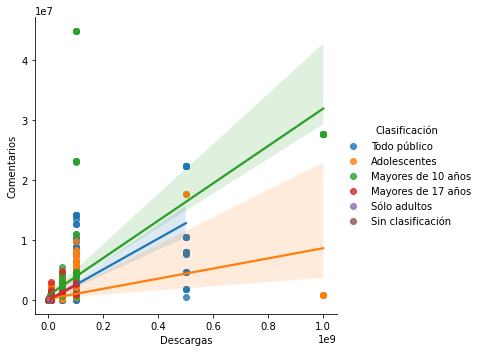

In [33]:
from seaborn import lmplot
lmplot(x="Descargas", y="Comentarios", hue="Clasificación", data=df)

Este grafico presenta la dispersión que existe entre entre la clasificación por tipo de cliente y el pago que se realizó, considerando el rango de edad que efectuo más cantidad de comentarios fueron "Mayores de 10 años". Asimismo, fueron los que efectuaron mayor cantidad de descargas "Mayores de 10 años" y "Adolescentes".


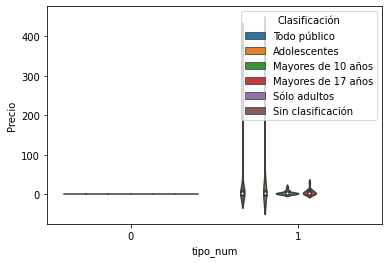

In [34]:
from seaborn import violinplot
violinplot(x="tipo_num", y="Precio", hue="Clasificación", data=df)

Este grafico presenta la clasificación por tipo de cliente; Tipo Gratis/pago. Lo mas relevantes, es que las personas que pagaron por las App fue "Todo Publico" y "Adolecentes". Para este modelo los Adultos no invierten dinero en comprar APP.

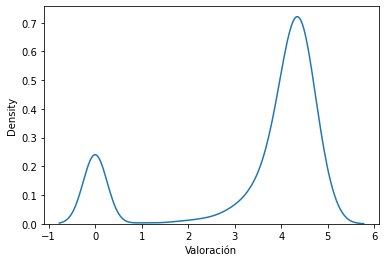

In [35]:
from seaborn import kdeplot
kdeplot(df.Valoración)
## densidad (muestra).

El grafico presenta la densidad de evaluación de la variable Valorización 
entre la valorización 0 (sin calificación) y el pick evaluadas entre 4 y 5, en compración con el modelo 1, decidimos modidficar los null por 0 en esta variable. 

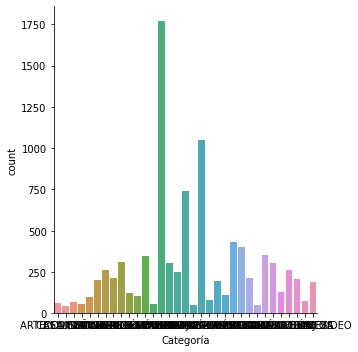

In [36]:
sns.catplot(x='Categoría',data=df,kind = 'count');

En este Grafico podemos visualizar que la Categoria que tiene mayor descarga es "Familia" con 1.770 descagar

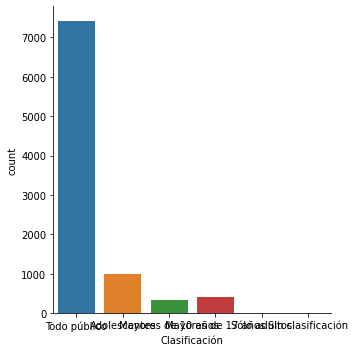

In [37]:
sns.catplot(x='Clasificación',data=df,kind = 'count');

Este grafico Presenta la Clasificación de clientes que mas descargas de APP, siendo este "Todo Publico" con un total de 7.415 registros, con mas de 41.245mil descargas

In [38]:
## Obtener datos para analisis
df.groupby(["Categoría"]).agg({'Descargas':'count'})


,Descargas
Categoría,
ARTE Y DISEÑO,65
BELLEZA,47
CASA Y HOGAR,68
CLIMA,57
COMIDA Y BEBIDA,100
COMPRAS,201
COMUNICACIÓN,264
DATOS,212
DEPORTES,310


In [39]:
df.groupby(['App']).agg({'Descargas':'count'})

,Descargas
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",1
+Download 4 Instagram Twitter,1
.R,1
/u/app,1
058.ba,1
...,...
¡Ay Metro!,1
¿Es Vegan?,1
Égalité et Réconciliation,1


In [40]:
## Obtenemos al APP con mayor vaorización 
df.groupby(['App']).agg({'Valoración':'count'})

,Valoración
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",1
+Download 4 Instagram Twitter,1
.R,1
/u/app,1
058.ba,1
...,...
¡Ay Metro!,1
¿Es Vegan?,1
Égalité et Réconciliation,1


In [41]:
## Buscamos el promedio de la Valoración
df["Categoría"].unique()

array(['ARTE Y DISEÑO', 'BELLEZA', 'CASA Y HOGAR', 'CLIMA',
       'COMIDA Y BEBIDA', 'COMPRAS', 'COMUNICACIÓN', 'DATOS', 'DEPORTES',
       'EDUCACIÓN', 'ENTRETENIMIENTO', 'ESTILO DE VIDA', 'EVENTOS',
       'FAMILIA', 'FINANCIERAS', 'FOTOGRAFÍA', 'HERRAMIENTAS',
       'HISTORIETAS', 'JUEGO', 'LIBRERIAS', 'LIBROS Y REFRERENCIAS',
       'MAPAS Y NAVEGACIÓN', 'MÉDICO', 'NEGOCIO', 'NOTICIAS', 'PADRES',
       'PERSONALIZACIÓN', 'PRODUCTIVIDAD', 'REPRODUCTORES DE VIDEO',
       'SALUD Y BELLEZA', 'SOCIAL', 'VEHICULOS', 'VIAJES'], dtype=object)

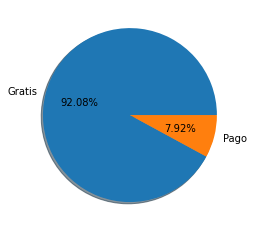

In [42]:
sizes = df['Tipo'].value_counts()
fig , ax = plt.subplots()
ax.pie(sizes,labels = ['Gratis', 'Pago'],autopct='%1.2f%%',shadow = True)
plt.show();

Este grafico presenta el tipo de la APP Tipo Gratis/pago. representando el 92,1% de las App descargadas son gratuitas (8.417), y el 7,92% es de pago correpondiente al total de registros.

## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

Efectuada la limpieza de los datos, obtuvimos las variables necesarias para comenzar comenzar a evaluar el modelo. Las variables modificadas a numericas nos permiten obtener la correlación necesaria. Asimismo, decidimos para los 1.416 datos null de la variable "Valoración", modificarlos por la media de esos datos, asociados a las variables Precio y Clasificación, siendo el 90% (1.271) de las descargas gratuitas ($0) sin valorización, por el tipo de cliente "Todo publico" corresondiente a un 78% de descargas gratuitas.

Dado el analisis anterior, la correlación para implementar el modelos son con las variables "Descargas" y "Comentarios"  

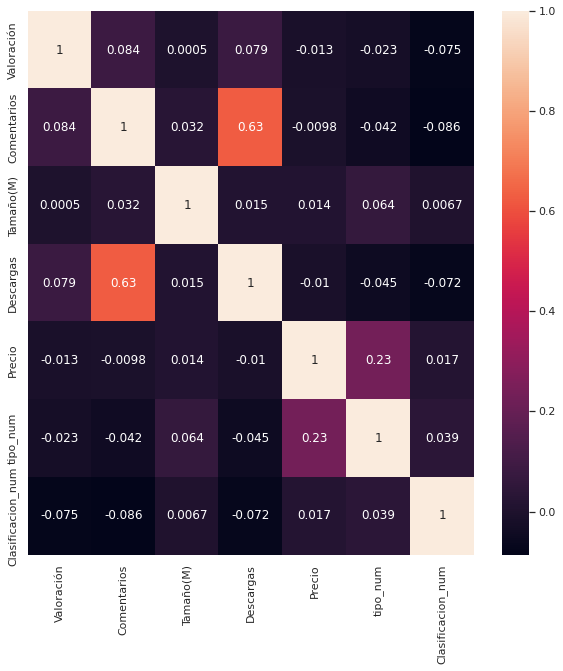

In [43]:
sns.set(
    rc={
        'figure.figsize':(10,10)
    }
)
sns.heatmap(
    df.corr(),
    annot=True
)

# Implemente sus modelos desde aquí

## 1er Modelo implementado de regresión

Definimos este modelo con desde las variables comentarios y valoración

In [44]:
caracteristicas = df[['Comentarios',
                      'Valoración']].astype(np.float64)
label = df['Descargas']
print(caracteristicas)
print(label)

      Comentarios  Valoración
0            48.0         4.8
1           353.0         4.7
2         36815.0         4.1
3        194216.0         4.3
4         13880.0         4.4
...           ...         ...
9136         69.0         3.0
9137         34.0         4.3
9138     165299.0         4.3
9139      35560.0         4.2
9140     136626.0         4.1

[9141 rows x 2 columns]
0           5000
1          10000
2        1000000
3        5000000
4        1000000
          ...   
9136       10000
9137        1000
9138    10000000
9139     5000000
9140    10000000
Name: Descargas, Length: 9141, dtype: int64


In [45]:
# Separamos la información para el entrenamiento de los datos
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size=0.25,
    random_state=2
)
print('Los datos para entrenamiento son :',datos_entre.shape)
print('Los datos para prueba son :',datos_prueba.shape)
print('Los eti para entrenamiento son :',eti_entre.shape)
print('Los eti para prueba son :',eti_prueba.shape)

Los datos para entrenamiento son : (6855, 2)
Los datos para prueba son : (2286, 2)
Los eti para entrenamiento son : (6855,)
Los eti para prueba son : (2286,)


In [46]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Comentarios  Valoración
5546      19922.0         4.6
6288          6.0         0.0
191       54090.0         4.5
8751       1403.0         4.3
8391     259605.0         4.4
...           ...         ...
1099       7543.0         4.3
2514      22667.0         4.3
6637          6.0         0.0
2575         11.0         0.0
7336      20973.0         3.1

[6855 rows x 2 columns]
5546      100000
6288        1000
191      5000000
8751      100000
8391    10000000
          ...   
1099      500000
2514     1000000
6637        1000
2575        1000
7336     5000000
Name: Descargas, Length: 6855, dtype: int64


,Comentarios,Valoración,Descargas
5546,19922.0,4.6,100000
6288,6.0,0.0,1000
191,54090.0,4.5,5000000
8751,1403.0,4.3,100000
8391,259605.0,4.4,10000000
...,...,...,...
1099,7543.0,4.3,500000
2514,22667.0,4.3,1000000
6637,6.0,0.0,1000
2575,11.0,0.0,1000


In [47]:
# sklearn
from sklearn.model_selection import train_test_split
# model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 

In [48]:
  # Entrenamieto de los modelos
  # DecisionTreeRegressor
  # LinearRegression
  # KNeighborsRegressor
  # RandomForestRegressor 
  modelos = []
  modelos.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
  modelos.append(("LinearRegression",LinearRegression()))
  modelos.append(("KNeighborsRegressor",KNeighborsRegressor()))
  modelos.append(("RandomForestRegressor",RandomForestRegressor())) 
  for nombre,modelo in modelos:
    modelo.fit(datos_entre,eti_entre)
    resultado = modelo.score(datos_prueba,eti_prueba)
    print("El modelo {mol} tiene un rendimiento del {ren:.2f}%".format(
        mol=nombre,
        ren=resultado*100
    ))

El modelo DecisionTreeRegressor tiene un rendimiento del 95.55%
El modelo LinearRegression tiene un rendimiento del -14.81%
El modelo KNeighborsRegressor tiene un rendimiento del 10.65%
El modelo RandomForestRegressor tiene un rendimiento del 73.17%


In [49]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier',KNeighborsClassifier()))
resultados = []
for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba,eti_prueba)
  resultados.append(resultado*100)
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      resultado*100
  ))

El modelo DecisionTreeClassifier tiene como resultado 45.32%
El modelo KNeighborsClassifier tiene como resultado 45.67%


# Evalúe sus modelos

En este modelo podemos evaluar que el rendimiento del 95,61% de DecisionTreeRegressor es bastante aceptable.
 

---




# Responda las preguntas planteadas

1-Que categoría de app obtuvo mas descargas

**Respuesta**: La categoría con mayor descarga fue "Familia" con 1770 descargas
y la aplicación mas descargada fue Roblox

2-Qué aplicación obtuvo mas valoraciones

**Respuesta**: la App con mayor cantidad de valoraciones es Roblox, con 9 valoraciones con nota 4,5, considerando que no afecta la valorización de los null= 0

3-Qué aplicación obtuvo más comentarios

**Respuesta**: la App con mayor cantidad de Comentarios es Roblox

4-Qué tipos de categorías de aplicaciones Existen en este modelo

**Respuesta**: Existen 33 tipos de categoridas, tales como: 'ARTE Y DISEÑO', 'BELLEZA', 'CASA Y HOGAR', 'CLIMA',
       'COMIDA Y BEBIDA', 'COMPRAS', 'COMUNICACIÓN', 'DATOS', 'DEPORTES',
       'EDUCACIÓN', 'ENTRETENIMIENTO', 'ESTILO DE VIDA', 'EVENTOS',
       'FAMILIA', 'FINANCIERAS', 'FOTOGRAFÍA', 'HERRAMIENTAS',
       'HISTORIETAS', 'JUEGO', 'LIBRERIAS', 'LIBROS Y REFRERENCIAS',
       'MAPAS Y NAVEGACIÓN', 'MÉDICO', 'NEGOCIO', 'NOTICIAS', 'PADRES',
       'PERSONALIZACIÓN', 'PRODUCTIVIDAD', 'REPRODUCTORES DE VIDEO',
       'SALUD Y BELLEZA', 'SOCIAL', 'VEHICULOS', 'VIAJES']


5-Que grupo de personas descarga más apliacciones

**Respuesta**: La Clasificación de clientes que mas descarga APP es "Todo Publico" con un total de 7.415 registros, con mas de 41.245mil descargas


6-Qué tipo de aplicación tiene mas descargas (Pago/gratis)

**Respuesta**: El tipo de la APP mas descargado entre Gratis y pago es  representado por el 92,1% de las App son gratuitas (correspondeinte a 8.417 registros con un volumen de 65.017 mil descargas) y el 7,92% de las app sonn pagadas (correspondeinte a 724 registros con un volumen de  48mil descargas)
